# Pythonで学ぶマクロ経済学 (中級＋レベル)
```{epigraph}
**Python for Intermediate+ Macroeconomics**

[春山 鉄源](https://t-haruyama.github.io)

神戸大学経済学研究科
```

<div name="html-admonition" style="font-size: 0.8em">
<input type="button" onclick="location.href='https://translate.google.com/translate?hl=&sl=ja&tl=en&u='+window.location;" value="Google translation" style="color:#ffffff;background-color:#008080; height:25px" onmouseover="this.style.background='#99ccff'" onmouseout="this.style.background='#008080'"/> in English or the language of your choice.
</div><br>

In [1]:
import datetime
dt = datetime.datetime.now()
print('Version:',dt.strftime('%Y年%m月%d日'))

Version: 2022年06月10日


<!---
%H:%M:%S
dt = datetime.datetime.now()
dt = datetime.datetime.today()
-->


本サイトに関するコメント等はGitHubの[Discussions](https://github.com/Py4Macro/py4macro.github.io/discussions)もしくは<haruyama@econ.kobe-u.ac.jp>にご連絡ください。

<br>

姉妹サイト：[「Pythonで学ぶ入門計量経済学」](https://py4etrics.github.io) <font size="+0">🐍</font>


<!--```{margin}-->
<!--<div name="html-admonition">-->
<!--Do you want to read in a differnt language? Start-->
<!--<input type="button" onclick="location.href='https://translate.google.com/translate?hl=&sl=ja&tl=en&u='+window.location;" value="Google" style="color:#ffffff;background-color:#008080;" onmouseover="this.style.background='#99ccff'" onmouseout="this.style.background='#008080'"/><input type="button" onclick="location.href='https://translate.google.com/translate?hl=&sl=ja&tl=en&u='+window.location;" value="translation" style="color:#ffffff;background-color:#008080;" onmouseover="this.style.background='#99ccff'" onmouseout="this.style.background='#008080'"/>-->
<!--in English or the language of your choice.-->
<!--</div>-->
<!--```-->
## はじめに

本サイトの目的は２つある。第一に，学部中級＋レベル（「＋」は中級より少し進んだという意味）のマクロ経済学をとおして`Python`を学び，`Python`をとおしてマクロ経済学を学ぶ（復習する）ことである。大学での経済学教育は主に講義でおこなわれる。モデルの展開と解説，データが紹介されるが，私もそうだったように「そういうものなんだ」と納得はするが，経済学との間になんとなく「距離」を感じる学生が多いのではないだろうか。その距離を縮めるために，演習や数値例を使った宿題があり，その役目はある程度果たしている。その距離を更に縮めようというのが本サイトの目的である。`Python`を使うことにより，学生自身がデータを操作し，データの特徴を確認できる。回帰分析も簡単におこなうことができる。更に，`Python`はデータだけではなく理論モデルの理解にも大いに役立つ。異なる政策がもたらす均衡への影響を数値化し，簡単に計算することができる。また複雑なマクロモデルの均衡の動学的な動きを視覚的に確認し，政策などのパラメータにどのように反応するかも一瞬で確認することができる。それもパラメータの値や組み合わせの変更も自由自在である。即ち，マクロ経済学のハンズオン（[hands-on](https://eow.alc.co.jp/search?q=hands-on)）が可能となる。ハンズオンこそが今の授業で足りないものであり，学生のマクロ経済学の理解と興味を深め「距離」を更に縮めることが期待できるのではないだろうか。

第二に，経済学部の学生に今後変わりゆく社会に少しでも対応できるように，[transferable skill](https://www.google.co.jp/search?q=transferable+skills&spell=1&sa=X&ved=2ahUKEwj68fqc7LPwAhWKfd4KHT_xC64QBSgAegQIARA1&biw=1440&bih=767)になり得るプログラミングを身につける機会を提供することである。新聞，雑誌やインターネット上で「AI」や「機械学習」などプログラミングに関するキーワードを頻繁に見聞きする。これは一過性の流行りではなく，社会全体がデジタル化する大きなうねりの「大音」である。実際，政府もプログラミングの重要性を強く認識している。2020年度からは小学校でプログラミング的思考を育成する学習指導要領が実施され，続いて中高教育でもプログラミングに関する内容・科目が充実される予定である（[文部科学省の参照リンク](https://www.mext.go.jp/a_menu/shotou/zyouhou/detail/1369613.htm)）。このようにプログラミングのスキルの重要性は益々大きくなると思われる。一方，今の経済学部の学生は，デジタル化による社会のうねりとプログラミング教育の盛り上がりの狭間にあり，プログラミングの「プの字」も知らずにデジタル化社会へ飛び込むことになりかねない。学生にとって卒業後の社会は「人生の本番」であり，その準備を少しでも手助けするのが教育の役割ではないだろうか。もちろん，近年一般教養科目としてプログラミング科目が導入されている大学も多くある。しかし専門科目として提供することにより専門性とプログラミングの「いいとこ取り」を提供できる機会を利用しないのは，経済学でいう「非効率的」な教育になってしまう。

では，なぜ`Python`なのか？プログラミング言語は無数に存在し，それぞれ様々な特徴があり，お互いに影響し合い進化している。その過程で広く使われ出す言語もあれば廃れていく言語もある。その中で`Python`は，近年注目を集める言語となっている。それを示す一つの参考指標として[2021 Kaggle Machine Learning & Data Science Survey](https://www.kaggle.com/competitions/kaggle-survey-2021/data)を紹介する。

```{figure} /images/popularity.jpeg
---
scale: 17%
name: popularity
---
2021年Kaggleアンケート結果（重複回答含む）
```

````{admonition} 棒グラフのコード
:class: dropdown

```
import japanize_matplotlib
import matplotlib.pyplot as plt
import pandas as pd

# load .csv
df = pd.read_csv('kaggle_survey_2021_responses.csv', header=1, dytype=object)

# 関連する列を抽出し，それぞれの言語の回数を計算
lang = df.iloc[:,20].value_counts().reset_index()
lang.columns = ['language','no']
lang = lang.query('language != "None"').sort_values('no').reset_index(drop=True)
lang['language'] = lang['language'].replace('Other','その他')

# プロット
fig, ax = plt.subplots(figsize=(6,9))
ax.barh(y='language', width='no', height=0.8, color='blue', data=lang)
ax.set_xlabel('回答回数', size=16)
ax.set_title('データサイエンティストを目指し\n初めてプログラミングを学ぶ人に\nどの言語を薦めますか？\n', size=25)

# 上と右の枠を削除
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)

# 棒の先に数字を追加
for i in ax.patches:
    ax.text(i.get_width()+300.0, i.get_y()+0.3,
             str(round((i.get_width()), 2)),
             fontsize=13, fontweight='bold',
             color='k')

# 縦軸のラベルのサイズ
ax.yaxis.set_tick_params(labelsize=17)
ax.xaxis.set_tick_params(labelsize=12)

# 縦横軸とラベルの間隔の調整
ax.xaxis.set_tick_params(pad=7)
ax.yaxis.set_tick_params(pad=10)
```
````

Google合同会社の子会社である[Kaggle](https://www.kaggle.com)は，データサイエンスや機械学習などに関連する課題を解決するためのコンテストがおこなわれる有名なオンライン・コミュニティであり，課題には賞金が設定され世界中からの参加者が切磋琢磨して競争する。2021年におこなわれたKaggle参加者へのアンケートの中に「データサイエンティストを目指し，初めてプログラミングを学ぶ人にどの言語を薦めますか？」の質問があり，その回答結果が{numref}`popularity`である。24,829の回答中（重複回答含む）81.4％が`Python`を選んでおり，`Python`のひとり勝ち状態である（2020年のアンケート結果では80.3%）。もう一つの人気指標として[Stack Overflow](https://stackoverflow.com/)（プログラミングに関する質問をすると参加者が回答する定評あるサイト）が集計するデータがある。それによると2012年頃からPythonの人気は急上昇している（[図はこちらを参照](https://py4etrics.github.io/index.html#stackoverflow)）。次にプログラミング言語のランキングで世界的に有名な[TIOBE programming community index](https://www.tiobe.com/tiobe-index/)を紹介しよう。2021年10月に更新されたサイトは次の文章から始まっている。
> For the first time in more than 20 years we have a new leader of the pack: the `Python` programming language. The long-standing hegemony of `Java` and `C` is over.

> （訳）20数年ぶりに群れのニュー・リーダーが現れた。`Python`プログラミング言語である。長く続いた`Java`と`C`の覇権は終わった。

`Python`の人気はどこにあるのだろうか？まず最初の理由は無料ということだろう。経済学研究でよく使われる数十万円するソフトと比べると，その人気の理由は理解できる。しかし計量経済学で広く使われる`R`を含めて他の多くの言語も無料であり，それだけが理由ではない。人気の第２の理由は汎用性である。`Python`はデータ分析や科学技術計算だけではなく，ゲーム（ゲーム理論ではない），画像処理や顔認識にも使われている。また多くの人が使うYouTubeやDropBoxにも`Python`が使われているのは有名である（DropBoxのコードは100万行以上あると言われている）。第３の理由は，学習コストが比較的に低いことである。`Python`のコードは英語を読む・書く感覚と近いため，他の言語と比べて可読性の高さが大きな特徴である（日本語に近い点もある）。これらの理由が上で紹介した結果に反映されていると考えられる。もちろん，`Python`の文法や基本的な関数を覚える必要があるが，相対的に最も初心者に易しい言語と言われており，スタートアップ企業にも人気がある。他にも理由はあるが，`Python`はIT産業だけではなく金融・コンサルティング・保険・医療などの幅広い分野で使われており，データ分析の重要性が増すごとにより多くの産業で使われると思われる。経済学部の大多数の卒業生は幅広い産業で働くことを考えると，社会全体で注目され今後より多くの産業で使われることが予想される言語を学ぶことは有意義ではないだろうか。

本サイトは４部構成となっている。第１部では，経済学の例をまじえて`Python`の基礎について解説する。第２部と第３部が本サイトの核心であり，`Python`を使い学部中級＋レベルのマクロ経済学について解説するとともに，`Python`コード自体の説明も適宜おこなっている。マクロ経済学の内容としては，第２部が経済成長や所得分布などを扱う長期的な分析となっており，第３部は景気循環に焦点を当てた短期分析を扱う。`Python`の特性を生かしマクロ・データを使った回帰分析や動学的なモデルを展開する。ソロー・モデルや学部レベルの標準的なモデルになりつつあるIS-MP-PCモデルはもちろん，実物的景気循環モデルやニューケインジアン・モデルについても学部生目線で解説する予定である。（従って，大学院生には物足りない内容となるが，直感的に理解するには有用であろう。）第４部では，参考になるトピックを集める計画である。

## 本サイトで使うPythonとパッケージのバージョン

In [2]:
import japanize_matplotlib, matplotlib, numpy, pandas, py4macro, scipy, see, statsmodels, wooldridge
from platform import python_version

packages = ['Python', 'matplotlib', 'numpy','pandas', 'py4macro', 'scipy','see', 'statsmodels', 'wooldridge']
versions = [python_version(), matplotlib.__version__, numpy.__version__, pandas.__version__, py4macro.__version__, scipy.__version__, see.__version__, statsmodels.__version__, wooldridge.__version__]

for pack, ver in zip(packages, versions):
    print('{0:14}{1}'.format(pack,ver))

Python        3.9.13
matplotlib    3.5.2
numpy         1.22.4
pandas        1.4.2
py4macro      0.6.1
scipy         1.8.1
see           1.4.1
statsmodels   0.13.2
wooldridge    0.4.4


## おまけ：景気循環のイメージ
[これを](https://www.google.co.jp/search?q=%E6%99%AF%E6%B0%97%E5%BE%AA%E7%92%B0%E3%80%80%E5%B1%B1%E3%80%80%E8%B0%B7%E3%80%80%E6%8B%A1%E5%BC%B5%E3%80%80%E5%BE%8C%E9%80%80&tbm=isch&ved=2ahUKEwjM44mptKL4AhUSdXAKHXW_BKYQ2-cCegQIABAA&oq=%E6%99%AF%E6%B0%97%E5%BE%AA%E7%92%B0%E3%80%80%E5%B1%B1%E3%80%80%E8%B0%B7%E3%80%80%E6%8B%A1%E5%BC%B5%E3%80%80%E5%BE%8C%E9%80%80&gs_lcp=CgNpbWcQA1AAWABggwhoAHAAeACAAa0BiAGtAZIBAzAuMZgBAKoBC2d3cy13aXotaW1nwAEB&sclient=img&ei=FPmiYsyJBJLqwQP1_pKwCg&bih=863&biw=1511)`Python`コードで書いてみた。

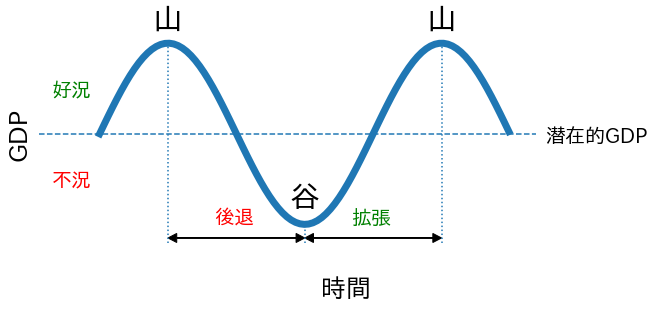

In [3]:
import japanize_matplotlib
import matplotlib.pyplot as plt
import numpy as np

# 下で使う数値
h = 0.35
v = 0.09
yshift = 0.2
ymax = 1 + yshift
ymin = -1 - yshift
ymax0 = (1-ymin)/(ymax-ymin)
ymax1 = yshift/(ymax-ymin)
font_largest=30
font_large=20

# GDPのプロット
x = np.arange(0,3.*np.pi,0.1)
y = np.sin(x)
fig, ax = plt.subplots(figsize=(11,4))
ax.plot(x, y, linewidth=7)
ax.set_ylim(ymin, ymax)
ax.set_xlim(-1.4, 12.7)

# 点線のプロット
ax.axhline(0, xmax=0.81, linestyle='--')
x_coordinates = [np.pi/2, np.pi*3/2, np.pi*5/2]
y_coordinates = [ymax0, ymax1, ymax0]
for x, y in zip(x_coordinates, y_coordinates):
    ax.axvline(x, ymax=y, linestyle=':')

# 矢印のプロット
for dx in [np.pi/2, -np.pi/2]:
    ax.arrow(x=np.pi, y=ymin+0.05, dx=dx, dy=0,
             width=0.01, head_width=0.1,head_length=0.2,
             length_includes_head=True,color='k')

for dx in [np.pi/2, -np.pi/2]:
    ax.arrow(x=2*np.pi, y=ymin+0.05, dx=dx, dy=0,
             width=0.01, head_width=0.1,head_length=0.2,
             length_includes_head=True,color='k')

# 注釈の挿入
ax.annotate('山', xy=(np.pi/2-h,1.15), size=font_largest)
ax.annotate('山', xy=(np.pi*5/2-h,1.15), size=font_largest)
ax.annotate('谷', xy=(np.pi*3/2-h,-0.8), size=font_largest)
ax.annotate('好況', xy=(-1.1,0.5-v), size=font_large, color='green')
ax.annotate('不況', xy=(-1.1,-0.5-v), size=font_large, color='red')
ax.annotate('後退', xy=(np.pi-0.5,-1.), size=font_large, color='red')
ax.annotate('拡張', xy=(2*np.pi-0.5,-1.), size=font_large, color='green')
ax.annotate('潜在的GDP', xy=(3*np.pi+0.8,-0.09), size=font_large)

# 横軸・縦軸のラベルを追加
ax.set_ylabel('GDP', size=font_large+5)
ax.set_xlabel('\n時間', size=font_large+5)

# 縦軸・横軸のラベルと目盛の削除
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_xticks([])
ax.set_yticks([])

# 枠を削除
for s in ['top', 'right', 'left','bottom']:
    ax.spines[s].set_visible(False)
pass

---

[Economists（経済学を勉強する人も含めて(?)）と付き合わない方が良い２１＋$\alpha$の理由]( http://inesad.edu.bo/developmentroast/2012/10/21-reasons-why-you-should-never-date-an-economist/)

---

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/Haruyama-KobeU/for_binder/main?filepath=for_binder.ipynb) for an interactive Jupyter Notebook session with empty code cells.